In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### В качестве непрерывного распределения воспользуемся распределением арксинуса 

(https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B0%D1%80%D0%BA%D1%81%D0%B8%D0%BD%D1%83%D1%81%D0%B0)

In [2]:
arc=sts.arcsine

Сгенерируем выборку из 1000 значений, 
и отрисуем на графике гистограмму этой выборки и функцию плотности рассматриваемого распределени.

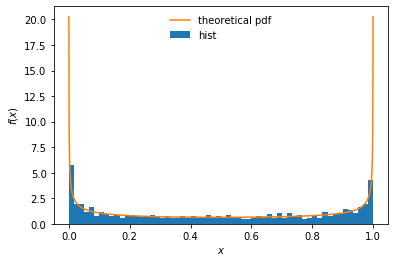

In [3]:
fig, ax = plt.subplots(1, 1)
sample = arc.rvs(size=1000)
ax.hist(sample, label='hist', bins=60, density=True)
x = np.linspace(arc.ppf(0.01), arc.ppf(0.99), 1000)
plt.plot(x, arc.pdf(x), label='theoretical pdf')
plt.xlabel('$x$')
plt.ylabel('$f(x) $')
ax.legend(loc='best', frameon=False)

Напишем функцию, которая генерирует 1000 выборок объёма $n$, задаёт параметры нормальному распрделению согласно ЦПТ и отрисовывает гистаграмму полученной выборки и функцию плотности нормального распределения с соответствующими параметрами

Параметры для нормального распределения определяются как 
$E=0.5$
$D=0.125/n$
, где $0.5$ и $0.125$ мат ожидание и дисперсия распределения арксинуса соответственно

In [4]:
def print_hist(n):
    means=[]
    for i in range(0,1000):
        means.append(arc.rvs(size=n).mean())

    norm_rv = sts.norm(0.5, (0.125/n)**0.5)
    plt.hist(means, bins=60, label='hist with n='+str(n), density=True)
    x = np.linspace(-1,2,1000)
    plt.plot(x, norm_rv.pdf(x), label='normal dist')
    plt.legend( loc='best', frameon=False)
    plt.title('n = '+str(n))
    plt.xlabel('$x$')
    plt.ylabel('$f(x) $')
    plt.show()

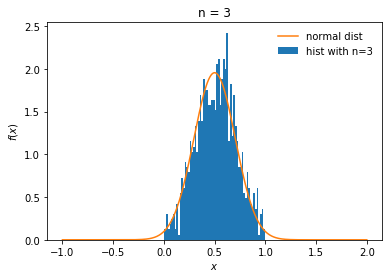

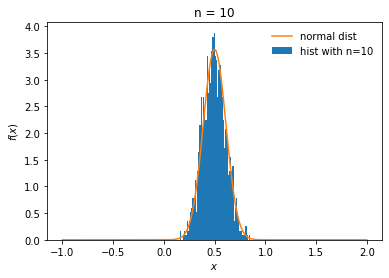

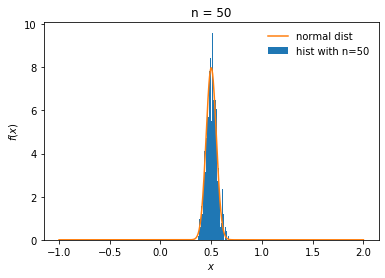

In [5]:
for n in [3, 10, 50]:
    print_hist(n)

При росте n графики плотности нормального распределения с параметрами, обратно зависящими  от n  сужаются, то есть дисперсия распределения уменьшается.

Из построенных гистограмм видно, что при росте n точность аппроксимации гистограмм выборочных средних функцией плотности нормального распределения растёт. 
